# <center>Porter Case Study</center>

# Introduction
- Porter, India's largest marketplace for intra-city logistics, is revolutionizing the delivery sector with technology-driven solutions.
- This case focuses on leveraging neural networks to accurately predict delivery times, a critical aspect of customer satisfaction in logistics.
- With a dataset encompassing various aspects of orders and deliveries, Porter aims to refine its delivery time estimations.
- Analyzing this dataset can provide significant insights into delivery dynamics, efficiency bottlenecks, and optimization opportunities.
- The insights obtained can enhance Porter's operational efficiency, ensuring timely deliveries and improving driver-partner allocation.

# What is expected?
- As a data scientist at Porter, your task is to analyze the dataset to accurately predict delivery times for different orders. Your primary goal is to build a regression model using neural networks, evaluate its performance, and provide insights for optimizing delivery operations.

# 1. Data
The analysis was done on the data located at - https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/039/original/dataset.csv.zip?1663710760 


# 2. Libraries
Below are the libraries required

In [105]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor

from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error

# 3. Data Loading
Loading the data into Pandas dataframe for easily handling of data

In [2]:
# read the file into a pandas dataframe
df = pd.read_csv('dataset.csv')
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64

In [3]:
# look at the top 20 rows
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [4]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [5]:
df.describe(include='object')

,created_at,actual_delivery_time,store_id,store_primary_category
count,197428,197421,197428,192668
unique,180985,178110,6743,74
top,2015-02-11 19:50:43,2015-02-11 20:40:45,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,5,937,19399


In [6]:
min(df['created_at']), max(df['created_at'])

('2014-10-19 05:24:15', '2015-02-18 06:00:44')

### Insight
- There are **197428** entries with 14 columns
- The data is available between **19-Oct-2014 to 18-Feb-2015**, around 5 months of data
- There are null/missing values in each of the dates
- There are no **duplicates**
- The columns **market_id, total_onshift_partners, total_busy_partners** and **total_outstanding_orders** can be of type **int64**
- The columns **market_id, order_protocol** and **num_distinct_items** can be converted to categorical columns
- The columns **created_at** and **actual_delivery_time** need to be of type **datetime**
- Extract **hour** and **day** of the order placement from **created_at**
- Create **delivery_time_mins** column by subracting **created_at** from **actual_delivery_time**
- Columns **created_at** and **actual_delivery_time** can be dropped

In [7]:
df[['total_onshift_partners', 'total_busy_partners' , 'total_outstanding_orders']] = df[['total_onshift_partners', 'total_busy_partners' , 'total_outstanding_orders']].astype('Int64')
df[['market_id', 'order_protocol', 'num_distinct_items']] = df[['market_id', 'order_protocol', 'num_distinct_items']].astype('category')
df[['created_at', 'actual_delivery_time']] = df[['created_at', 'actual_delivery_time']].astype('datetime64[ns]')
df['created_hour']=df['created_at'].dt.hour
df['created_day']=df['created_at'].dt.dayofweek
df['delivery_time_mins'] = round((df['actual_delivery_time'] - df['created_at'])/pd.Timedelta(minutes=1), 0)
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 196441 non-null  category
 1   store_id                  197428 non-null  object  
 2   store_primary_category    192668 non-null  object  
 3   order_protocol            196433 non-null  category
 4   total_items               197428 non-null  int64   
 5   subtotal                  197428 non-null  int64   
 6   num_distinct_items        197428 non-null  category
 7   min_item_price            197428 non-null  int64   
 8   max_item_price            197428 non-null  int64   
 9   total_onshift_partners    181166 non-null  Int64   
 10  total_busy_partners       181166 non-null  Int64   
 11  total_outstanding_orders  181166 non-null  Int64   
 12  created_hour              197428 non-null  int32   
 13  created_day               197

In [8]:
df.describe()

,total_items,subtotal,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_day,delivery_time_mins
count,197428.000000,197428.000000,197428.000000,197428.000000,181166.0,181166.0,181166.0,197428.000000,197428.000000,197421.000000
mean,3.196391,2682.331402,686.218470,1159.588630,44.808093,41.739747,58.050065,8.467213,3.218966,48.470492
std,2.666546,1823.093688,522.038648,558.411377,34.526783,32.145733,52.66183,8.658759,2.045789,320.494384
min,1.000000,0.000000,-86.000000,0.000000,-4.0,-5.0,-6.0,0.000000,0.000000,2.000000
25%,2.000000,1400.000000,299.000000,800.000000,17.0,15.0,17.0,2.000000,1.000000,35.000000
50%,3.000000,2200.000000,595.000000,1095.000000,37.0,34.0,41.0,3.000000,3.000000,44.000000
75%,4.000000,3395.000000,949.000000,1395.000000,65.0,62.0,85.0,19.000000,5.000000,56.000000
max,411.000000,27100.000000,14700.000000,14700.000000,171.0,154.0,285.0,23.000000,6.000000,141948.000000


# 4. Exploratory Data Analysis

## 4.1. Univariate Analysis

### 4.1.1. Numerical variables

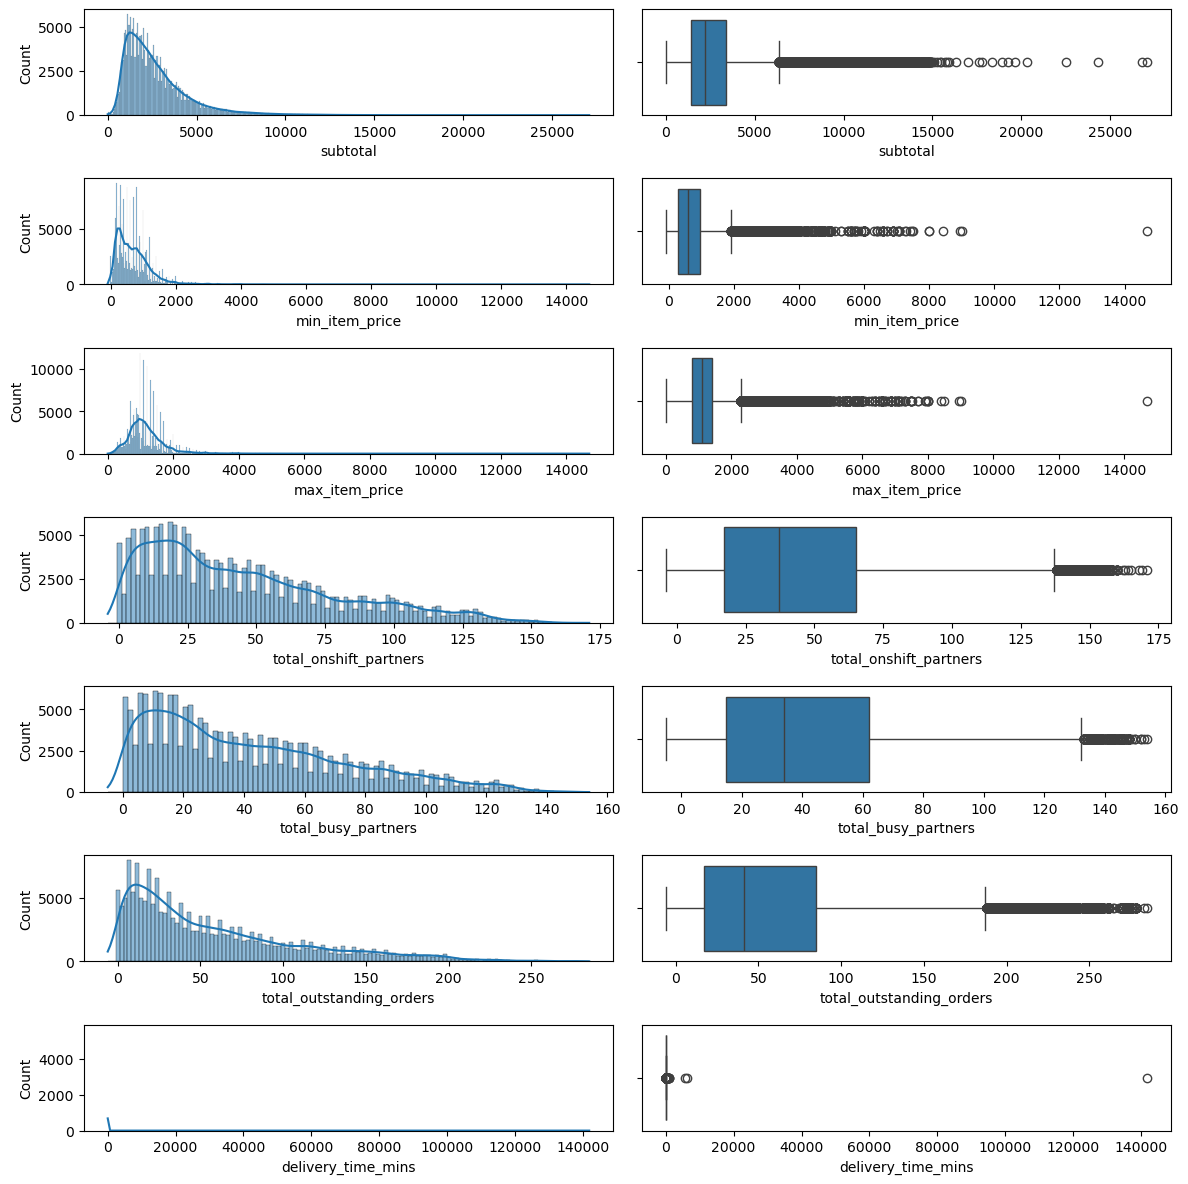

In [9]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize = (12, 12))
sns.histplot(data=df, x = "subtotal", kde=True, ax=axes[0,0])
sns.boxplot(data=df, x = "subtotal", ax=axes[0,1])
sns.histplot(data=df, x = "min_item_price", kde=True, ax=axes[1,0])
sns.boxplot(data=df, x = "min_item_price", ax=axes[1,1])
sns.histplot(data=df, x = "max_item_price", kde=True, ax=axes[2,0])
sns.boxplot(data=df, x = "max_item_price", ax=axes[2,1])
sns.histplot(data=df, x = "total_onshift_partners", kde=True, ax=axes[3,0])
sns.boxplot(data=df, x = "total_onshift_partners", ax=axes[3,1])
sns.histplot(data=df, x = "total_busy_partners", kde=True, ax=axes[4,0])
sns.boxplot(data=df, x = "total_busy_partners", ax=axes[4,1])
sns.histplot(data=df, x = "total_outstanding_orders", kde=True, ax=axes[5,0])
sns.boxplot(data=df, x = "total_outstanding_orders", ax=axes[5,1])
sns.histplot(data=df, x = "delivery_time_mins", kde=True, ax=axes[6,0])
sns.boxplot(data=df, x = "delivery_time_mins", ax=axes[6,1])
plt.tight_layout()
plt.show()    

### Insight
- Majority of the **subtotal** is in the range of 0 to 5000
- Majority of **min_item_price** and **max_item_price** are in the range of 0 to 2000
- **total_onshift_partners**, **total_busy_partners**, **total_outstanding_orders** and **delivery_time_mins** seem to follow similar kind of distribution - right skewed
- The boxplot clearly shows the presence of **outliers** in **subtotal**, **min_item_price**, **max_item_price** and **delivery_time_mins**

### 4.1.2. Categorical variables

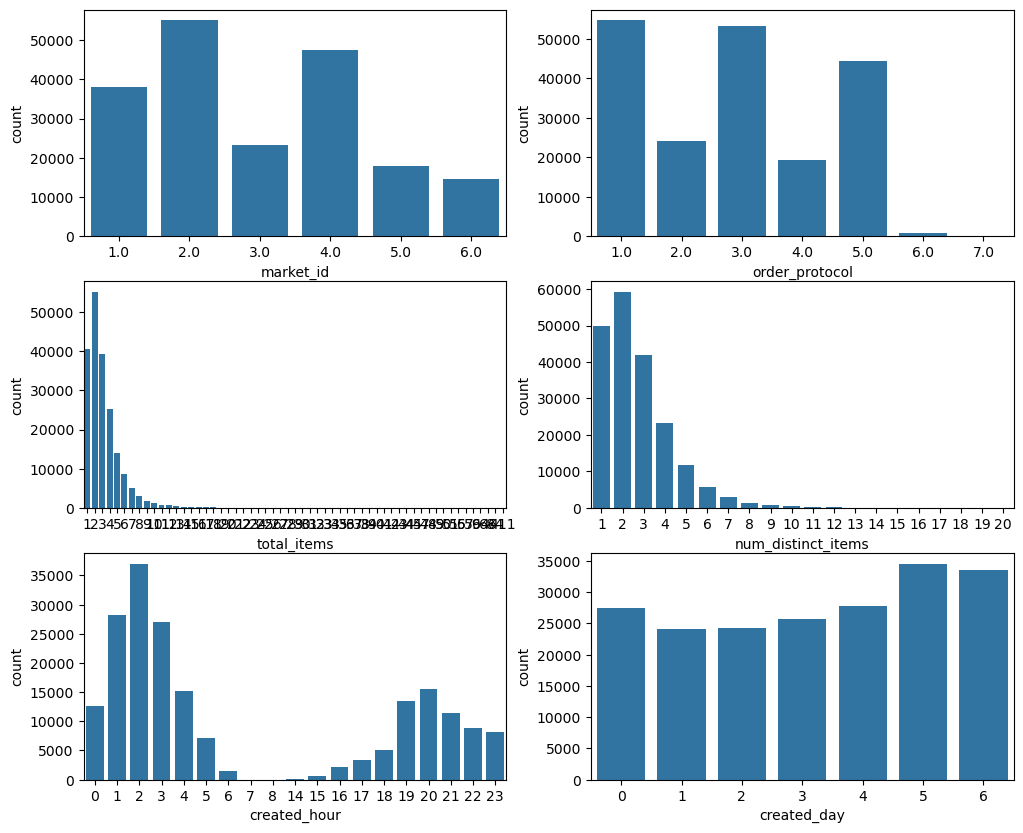

In [10]:
fig, axes = plt.subplots(3,2,figsize=(12,10))
sns.countplot(ax=axes[0,0], data=df, x='market_id')
sns.countplot(ax=axes[0,1], data=df, x='order_protocol')
sns.countplot(ax=axes[1,0], data=df, x='total_items')
sns.countplot(ax=axes[1,1], data=df, x='num_distinct_items')
sns.countplot(ax=axes[2,0], data=df, x='created_hour')
sns.countplot(ax=axes[2,1], data=df, x='created_day')
plt.show()

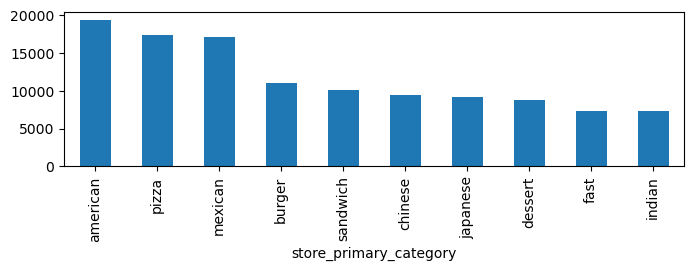

In [11]:
df['store_primary_category'].value_counts()[:10].plot(kind='bar', figsize = (8, 2))
plt.show()

In [12]:
df['store_id'].value_counts()[:5]

store_id
d43ab110ab2489d6b9b2caa394bf920f    937
757b505cfd34c64c85ca5b5690ee5293    863
faacbcd5bf1d018912c116bf2783e9a1    815
cfecdb276f634854f3ef915e2e980c31    765
45c48cce2e2d7fbdea1afc51c7c6ad26    721
Name: count, dtype: int64

### Insight
- market_id **2** is the major contributor
- Majority of order placement are through protocal **1** and **3**
- Majority of orders have **2** num_distinct_items as well as **2** total_items
- Majority of the orders are placed at around **2AM**
- Majority of the orders are placed on **weekends**
- Majority of orders delivered are from **american** restaurant
- Majority of orders delivered are from **d43ab110ab2489d6b9b2caa394bf920f** store

## 4.2. Missing value treatment

In [13]:
df.isna().sum()/len(df)*100

market_id                   0.499929
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
created_hour                0.000000
created_day                 0.000000
delivery_time_mins          0.003546
dtype: float64

### Insight
- Only **0.5%** of data has missing market_id. I will **drop** all these entries
- **2.4%** of data has missing store_primary_category. I will **replace** these with 'other' category
- Only **0.5%** of data has missing order_protocol. I will **drop** all these entries
- **8.24%** of data has missing total_onshift_partners, total_busy_partners and total_outstanding_orders each. I will use **KNN imputation** to replace the missing value.
- Only **0.0035%** of data has missing delivery_timw_mins. I will **drop** these entries too

In [14]:
df.dropna(subset=['market_id', 'order_protocol', 'delivery_time_mins'], inplace=True)
df.fillna({'store_primary_category':'other'}, inplace=True)

Remove rows which have -ve values in min_item_price, max_item_price, total_onshift_partners, total_busy_partners, total_outstanding_orders

In [15]:
mask = (df['min_item_price'] >= 0) & (df['max_item_price'] >= 0) & (df['total_onshift_partners'] >= 0) & (df['total_busy_partners'] >= 0) & (df['total_outstanding_orders'] >= 0)
df = df[mask]

In [16]:
# Columns to apply KNN Imputation
columns_to_impute = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)
# Apply KNN Imputer only to specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [17]:
df.isna().sum()/len(df)*100

market_id                   0.0
store_id                    0.0
store_primary_category      0.0
order_protocol              0.0
total_items                 0.0
subtotal                    0.0
num_distinct_items          0.0
min_item_price              0.0
max_item_price              0.0
total_onshift_partners      0.0
total_busy_partners         0.0
total_outstanding_orders    0.0
created_hour                0.0
created_day                 0.0
delivery_time_mins          0.0
dtype: float64

Let us look at the distribution again after imputation

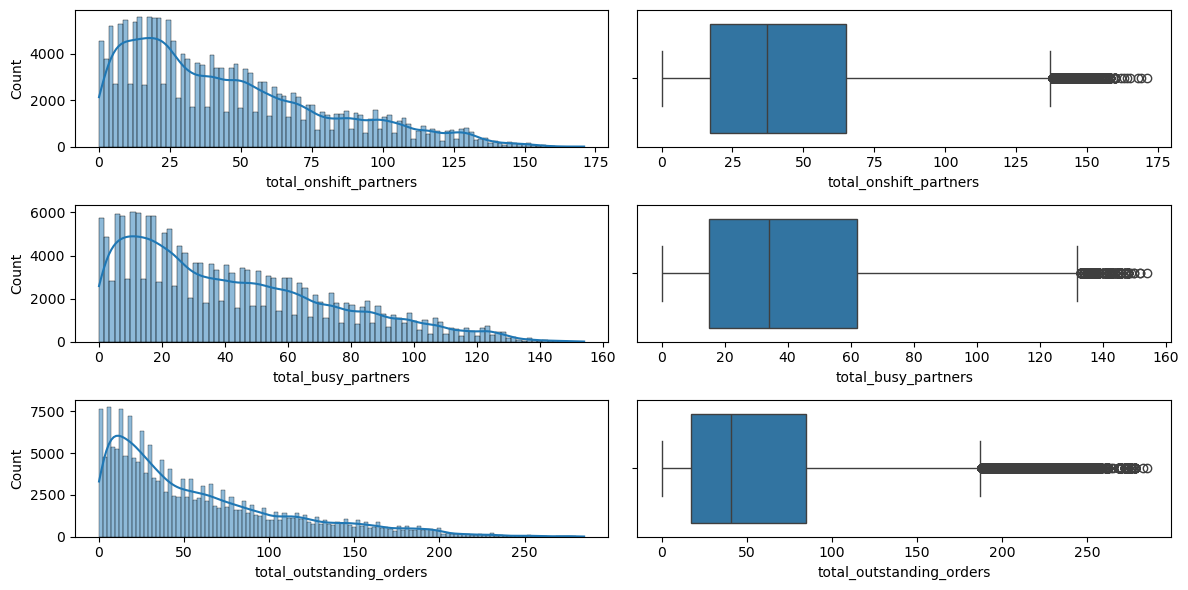

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (12, 6))
sns.histplot(data=df, x = "total_onshift_partners", kde=True, ax=axes[0,0])
sns.boxplot(data=df, x = "total_onshift_partners", ax=axes[0,1])
sns.histplot(data=df, x = "total_busy_partners", kde=True, ax=axes[1,0])
sns.boxplot(data=df, x = "total_busy_partners", ax=axes[1,1])
sns.histplot(data=df, x = "total_outstanding_orders", kde=True, ax=axes[2,0])
sns.boxplot(data=df, x = "total_outstanding_orders", ax=axes[2,1])
plt.tight_layout()
plt.show()    

## 4.2. Outliers treatment

In [19]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes
df['store_id']=df['store_id'].astype('category').cat.codes

In [26]:
for col in ['subtotal', 'min_item_price', 'max_item_price', 'delivery_time_mins', 'total_items']:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

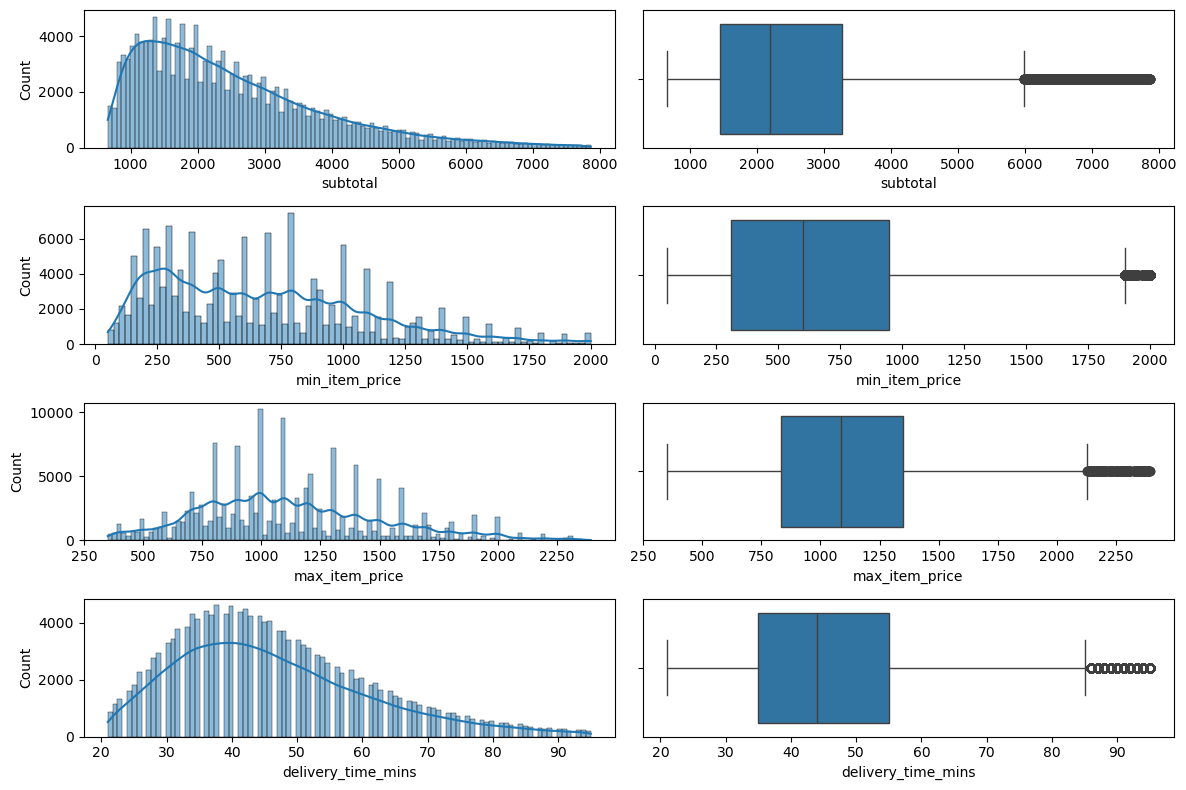

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (12, 8))
sns.histplot(data=df, x = "subtotal", kde=True, ax=axes[0,0])
sns.boxplot(data=df, x = "subtotal", ax=axes[0,1])
sns.histplot(data=df, x = "min_item_price", kde=True, ax=axes[1,0])
sns.boxplot(data=df, x = "min_item_price", ax=axes[1,1])
sns.histplot(data=df, x = "max_item_price", kde=True, ax=axes[2,0])
sns.boxplot(data=df, x = "max_item_price", ax=axes[2,1])
sns.histplot(data=df, x = "delivery_time_mins", kde=True, ax=axes[3,0])
sns.boxplot(data=df, x = "delivery_time_mins", ax=axes[3,1])
plt.tight_layout()
plt.show()    

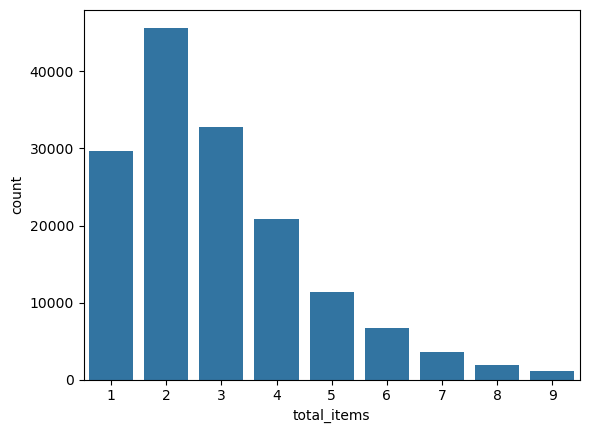

In [32]:
sns.countplot(data=df, x='total_items')
plt.show()

### Insight
- The distribution of data looks better after removal of outliers
- It can be seen that most of the delivery is done in **40mins**

## 4.3. Bivariate Analysis

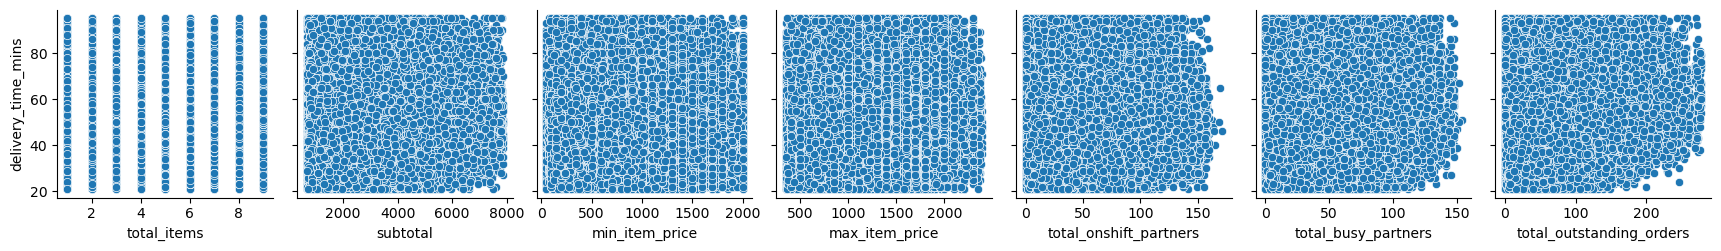

In [33]:
sns.pairplot(
    df, 
    x_vars=['total_items', 'subtotal', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders'],
    y_vars=['delivery_time_mins'],)
plt.show()

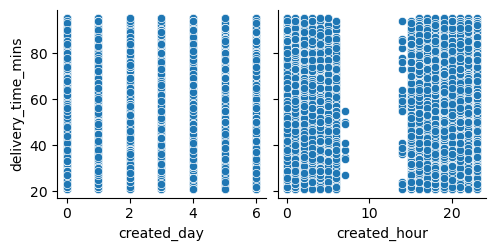

In [34]:
sns.pairplot(
    df, 
    x_vars=['created_day', 'created_hour'],
    y_vars=['delivery_time_mins'],)
plt.show()

### Insight
- There doesnt seem to be any relationship of delivery time with other features
- Delivery time is almost same for all days

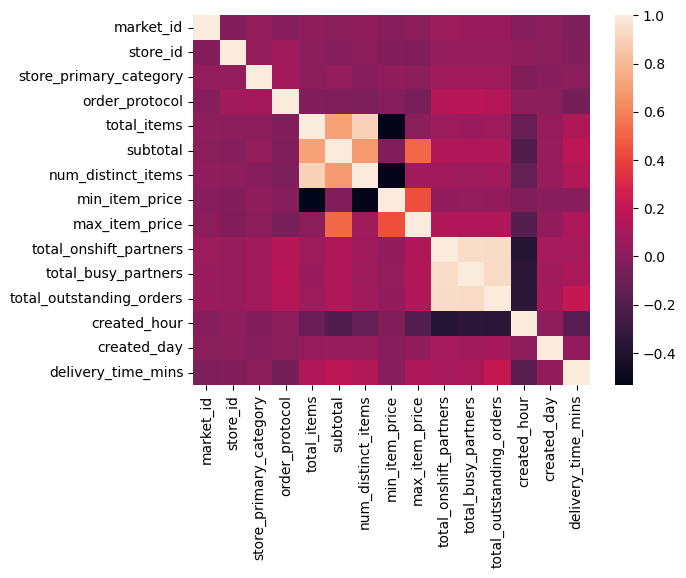

In [35]:
sns.heatmap(df.corr())
plt.show()

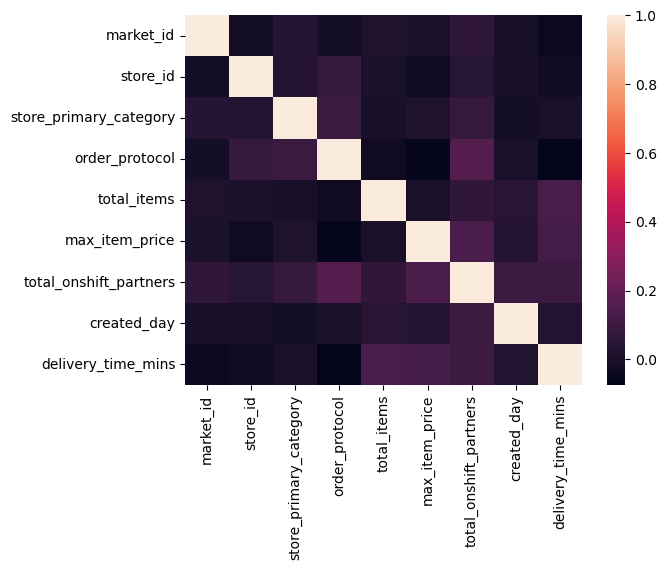

In [36]:
sns.heatmap(df[['market_id', 'store_id', 'store_primary_category', 'order_protocol', 'total_items', 'max_item_price', 'total_onshift_partners', 'created_day', 'delivery_time_mins']].corr())
plt.show()

### Insight
- Here also we see that there is no relation between delivery time and other features

# 5. NN Modelling

## 5.1. Training a NN model

I feel the store id, store primary category and order protocol will not effect delivery time, hece dropping them from feature list

In [37]:
df_reduced = df.drop(['store_id', 'store_primary_category', 'order_protocol'], axis=1)

In [39]:
# Example to demonstrate categorical encoding
def encode_categorical_data(dataframe):
    # Assume some features are categorical
    categorical_columns = ['market_id']

    # Apply One-Hot Encoding
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
    encoded_features = pd.DataFrame(
        one_hot_encoder.fit_transform(dataframe[categorical_columns]),
        columns=one_hot_encoder.get_feature_names_out(categorical_columns)
    )
    
    # Drop original categorical columns and concatenate encoded columns
    dataframe = dataframe.drop(categorical_columns, axis=1)
    dataframe = pd.concat([dataframe.reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)
    return dataframe

In [40]:
# Encode categorical data
df_reduced_encoded = encode_categorical_data(df_reduced)

In [41]:
df_reduced_encoded.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_day,delivery_time_mins,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,4,3441,4,557,1239,33.0,14.0,21.0,22,4,63.0,0.0,0.0,0.0,0.0,0.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,21,1,67.0,1.0,0.0,0.0,0.0,0.0
2,1,1900,1,1900,1900,1.0,0.0,0.0,20,3,30.0,0.0,1.0,0.0,0.0,0.0
3,6,6900,5,600,1800,1.0,1.0,2.0,21,1,51.0,0.0,1.0,0.0,0.0,0.0
4,3,3900,3,1100,1600,6.0,6.0,9.0,2,6,40.0,0.0,1.0,0.0,0.0,0.0


In [42]:
# Split data into features and target
y = df_reduced_encoded['delivery_time_mins']
X = df_reduced_encoded.drop('delivery_time_mins', axis=1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.layers import LeakyReLU
from tensorflow.keras.losses import LogCosh, Huber
from tensorflow.keras.callbacks import Callback
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError

In [159]:
# Model definition function
def create_and_train_model(X_train, y_train, X_test, y_test, epochs=50):

    # Model definition
    def create_model(input_shape):
        model = Sequential([
            Dense(32, input_shape=(input_shape,), kernel_initializer='he_normal'),
            BatchNormalization(),
            LeakyReLU(alpha=0.01),
            Dense(64),
            BatchNormalization(),
            LeakyReLU(alpha=0.01),
            Dense(128),
            BatchNormalization(),
            LeakyReLU(alpha=0.01),
            Dense(64),
            BatchNormalization(),
            LeakyReLU(alpha=0.01),
            Dense(1, activation='linear')
        ])

        model.compile(optimizer=Adam(learning_rate=0.001, global_clipnorm=1.0), loss='mse', metrics=['mae'])
        return model

    class GradientLogger(Callback):
        def __init__(self, train_data):
            super().__init__()
            self.train_data = train_data  # Training data as (X, y)
    
        def on_epoch_end(self, epoch, logs=None):
            # Get the training data
            X, y = self.train_data
            with tf.GradientTape() as tape:
                # Forward pass
                y_pred = self.model(X, training=True)  # Access self.model directly
                # Compute the loss
                loss = self.model.compiled_loss(y, y_pred)
            
            # Compute gradients
            gradients = tape.gradient(loss, self.model.trainable_variables)
            
            # Log gradient statistics
            grad_norms = [tf.norm(g).numpy() for g in gradients if g is not None]
            print(f"\nEpoch {epoch + 1}: Gradient Norms:")
            print(f"  Mean: {np.mean(grad_norms):.4f}")
            print(f"  Min: {np.min(grad_norms):.4f}")
            print(f"  Max: {np.max(grad_norms):.4f}")

    X_train_sample, y_train_sample = X_train[:100], y_train[:100]
    gradient_logger = GradientLogger(train_data=(X_train_sample, y_train_sample))

    # Create and train the model
    input_shape = X_train.shape[1]
    model = create_model(input_shape)
    history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_split=0.1, batch_size=512, callbacks=[gradient_logger])

    # Predictions and final MSE calculation
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    
    # Plot training and validation loss
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Training and Validation Loss Across Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return mse

Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


205/216 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2249.5393 - mae: 45.0351
Epoch 1: Gradient Norms:
  Mean: 44.9948
  Min: 0.0000
  Max: 345.6995
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2238.4680 - mae: 44.9097 - val_loss: 1803.5947 - val_mae: 39.8345
Epoch 2/50
 26/216 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1605.2399 - mae: 37.4779 

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:664: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(


203/216 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1440.5004 - mae: 35.1261
Epoch 2: Gradient Norms:
  Mean: 56.2747
  Min: 0.0000
  Max: 322.0479
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1426.9658 - mae: 34.9186 - val_loss: 871.9685 - val_mae: 26.0319
Epoch 3/50
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 613.4295 - mae: 20.5820
Epoch 3: Gradient Norms:
  Mean: 54.2441
  Min: 0.0000
  Max: 196.7765
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 612.0215 - mae: 20.5487 - val_loss: 250.4935 - val_mae: 11.8398
Epoch 4/50
212/216 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 200.9866 - mae: 10.7713
Epoch 4: Gradient Norms:
  Mean: 49.0397
  Min: 0.0000
  Max: 246.7629
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 200.6886 - mae: 10.7671 - val_loss: 190.4771 - val_mae: 10.5099
Epoch 5/50
214/216 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 178.1042 - mae: 10.4803
Epoch 5: Gradient Norms:
  Mean: 43.3286
  Min: 0.0000
  Max: 220.3572
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1

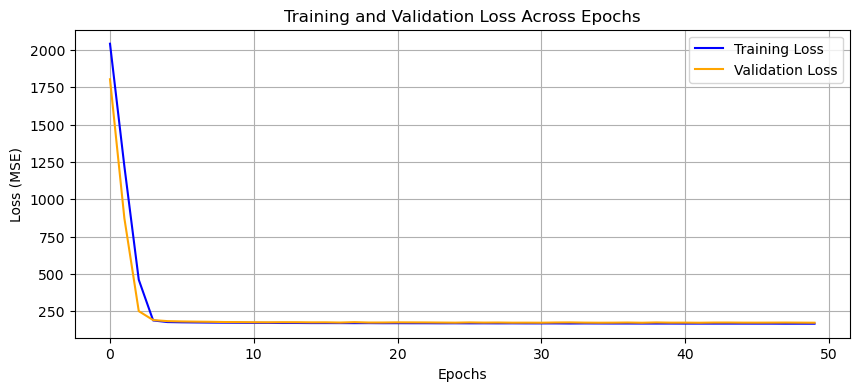

In [160]:
# Train model with all features
mse_all_features = create_and_train_model(X_train_scaled, y_train, X_test_scaled, y_test)

In [161]:
mse_all_features

168.559646042214

- Increasing the number of layers, number of neurons or changing the optmizers did not give better performance than the above model